# Know the Genre

#### Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Acquisition

#### Importing the data from csv file into a Dataframe.

In [2]:
movies_data = pd.read_csv("./movielens/movies.csv",sep =",")

In [3]:
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Data Transformation

#### Extracting 'Year' from the Movie Title

In [4]:
year = movies_data["title"].str.extract(".*\((.*)\).*")
year.head()

,0
0,1995
1,1995
2,1995
3,1995
4,1995


#### Concatenating the movies_data dataframe with year dataframe.

In [5]:
movies_data = pd.concat([movies_data,year], axis =1, join="inner")

In [6]:
movies_data = movies_data.rename({"title":"Title", "genres":"Genres", 0:"Year"}, axis = "columns")
movies_data.head()

,movieId,Title,Genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [7]:
len(movies_data['Year'].unique().tolist())

108

### Data Cleaning

#### Identifying records where Year ranges over two year time span.

In [8]:
clean_filter = movies_data["Year"].str.len()>4
movies_data[clean_filter]

,movieId,Title,Genres,Year
9518,171749,Death Note: Desu nôto (2006–2007),(no genres listed),2006–2007


#### Replacing the identified record with NA

In [9]:
movies_data = movies_data.replace(movies_data[clean_filter], np.nan)

In [10]:
movies_data.isna()

,movieId,Title,Genres,Year
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


#### Deleting the record

In [11]:
movies_data = movies_data.dropna(how='any')

#### Checking that the dataframe is now clean.

In [12]:
movies_data[clean_filter]

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,movieId,Title,Genres,Year


### Data Processing

In [13]:
movies_data["Year"].max()

'2018'

In [14]:
movies_data["Year"].min()

'1902'

#### Creating a new dataframe by grouping the movies data based on Year.

In [15]:
movies_by_year = movies_data.groupby(movies_data["Year"])

In [16]:
movies_by_year.get_group('1995')

,movieId,Title,Genres,Year
0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2.0,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1995
3,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5.0,Father of the Bride Part II (1995),Comedy,1995
5,6.0,Heat (1995),Action|Crime|Thriller,1995
6,7.0,Sabrina (1995),Comedy|Romance,1995
7,8.0,Tom and Huck (1995),Adventure|Children,1995
8,9.0,Sudden Death (1995),Action,1995
9,10.0,GoldenEye (1995),Action|Adventure|Thriller,1995


#### Checking the years for which movies data is present.

In [17]:
year_list = movies_data['Year'].unique().tolist()
year_list.sort()
print(year_list)

['1902', '1903', '1908', '1915', '1916', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


In [18]:
movies_by_year.get_group('1995')["Genres"].tolist()

['Adventure|Animation|Children|Comedy|Fantasy',
 'Adventure|Children|Fantasy',
 'Comedy|Romance',
 'Comedy|Drama|Romance',
 'Comedy',
 'Action|Crime|Thriller',
 'Comedy|Romance',
 'Adventure|Children',
 'Action',
 'Action|Adventure|Thriller',
 'Comedy|Drama|Romance',
 'Comedy|Horror',
 'Adventure|Animation|Children',
 'Drama',
 'Action|Adventure|Romance',
 'Crime|Drama',
 'Drama|Romance',
 'Comedy',
 'Comedy',
 'Action|Comedy|Crime|Drama|Thriller',
 'Comedy|Crime|Thriller',
 'Crime|Drama|Horror|Mystery|Thriller',
 'Action|Crime|Thriller',
 'Drama|Sci-Fi',
 'Drama|Romance',
 'Drama',
 'Children|Drama',
 'Drama|Romance',
 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
 'Crime|Drama',
 'Drama',
 'Mystery|Sci-Fi|Thriller',
 'Children|Drama',
 'Crime|Drama',
 'Children|Comedy',
 'Comedy|Romance',
 'Drama',
 'Drama|War',
 'Action|Crime|Drama',
 'Drama',
 'Action|Adventure|Fantasy',
 'Comedy|Drama|Thriller',
 'Drama|Romance',
 'Mystery|Thriller',
 'Animation|Children|Drama|Musical|Romance',
 'Dram

In [19]:
temp_list = movies_by_year.get_group('1995')["Genres"].tolist()
another_list = []
for x in temp_list:
    another_list.extend(x.split("|"))
print(another_list)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Adventure', 'Children', 'Fantasy', 'Comedy', 'Romance', 'Comedy', 'Drama', 'Romance', 'Comedy', 'Action', 'Crime', 'Thriller', 'Comedy', 'Romance', 'Adventure', 'Children', 'Action', 'Action', 'Adventure', 'Thriller', 'Comedy', 'Drama', 'Romance', 'Comedy', 'Horror', 'Adventure', 'Animation', 'Children', 'Drama', 'Action', 'Adventure', 'Romance', 'Crime', 'Drama', 'Drama', 'Romance', 'Comedy', 'Comedy', 'Action', 'Comedy', 'Crime', 'Drama', 'Thriller', 'Comedy', 'Crime', 'Thriller', 'Crime', 'Drama', 'Horror', 'Mystery', 'Thriller', 'Action', 'Crime', 'Thriller', 'Drama', 'Sci-Fi', 'Drama', 'Romance', 'Drama', 'Children', 'Drama', 'Drama', 'Romance', 'Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi', 'Crime', 'Drama', 'Drama', 'Mystery', 'Sci-Fi', 'Thriller', 'Children', 'Drama', 'Crime', 'Drama', 'Children', 'Comedy', 'Comedy', 'Romance', 'Drama', 'Drama', 'War', 'Action', 'Crime', 'Drama', 'Drama', 'Action', 'Adventure',

#### Idenitfying different genres in a particular year.

In [20]:
distinct_genres = []
for x in another_list:
    if x not in distinct_genres:
        distinct_genres.append(x)
print(distinct_genres)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir']


#### Calculating the number of times a particular genre was part of a movie of a particular year.

In [21]:
from collections import Counter
genre_counts = Counter(another_list)
print(genre_counts)

Counter({'Drama': 123, 'Comedy': 91, 'Romance': 49, 'Action': 44, 'Thriller': 42, 'Crime': 33, 'Adventure': 29, 'Children': 29, 'Sci-Fi': 20, 'Horror': 19, 'Mystery': 18, 'Fantasy': 16, 'War': 14, 'Animation': 13, 'Documentary': 6, 'Western': 6, 'Musical': 4, 'IMAX': 1, 'Film-Noir': 1})


#### Calculating the genre that was present the most number of times in a particular year.

In [22]:
max_genre_count = ""
max_count = 0
for k,v in genre_counts.items():
    if v>max_count:
        max_count = v
        max_genre_count = k
print(max_genre_count)

Drama


#### Deriving the most common genre of a particular year, for all years.

In [23]:
from collections import Counter
max_genre_list = []
for year in year_list:
    temp_list = movies_by_year.get_group(year)["Genres"].tolist()
    another_list = []
    for x in temp_list:
        another_list.extend(x.split("|"))
    genre_counts = Counter(another_list)
    max_genre_count = ""
    max_count = 0
    for k,v in genre_counts.items():
        if v>max_count:
            max_count = v
            max_genre_count = k
    max_genre_list.append(max_genre_count)
max_genre_df = pd.DataFrame({"Year":year_list, "Max_genre": max_genre_list})
max_genre_df

,Year,Max_genre
0,1902,Action
1,1903,Crime
2,1908,Animation
3,1915,Drama
4,1916,Drama
5,1917,Comedy
6,1919,Comedy
7,1920,Crime
8,1921,Comedy
9,1922,Horror


In [24]:
max_genre_df.Year = max_genre_df.Year.astype(np.int64)

#### Determing which genre is most common among the movies of all time.

In [25]:
max_genre_dict = Counter(max_genre_list)
max_count
genre_max = ""
for k,v in max_genre_dict.items():
    if v>max_count:
        max_count=v
        genre_max = k
print("The genre that has been the most common all these years is:", genre_max)

The genre that has been the most common all these years is: Drama


### Data Visualization

#### Plotting the pie chart, wherein the most common genre of a particular year is being displayed in context of most common genres of each year.

([<matplotlib.patches.Wedge at 0x26d36d030b8>,
 [Text(1.09952,0.0325967,'Action'),
  Text(1.09228,0.1301,'Crime'),
  Text(1.07641,0.226576,'Animation'),
  Text(-0.789258,0.766206,'Drama'),
  Text(0.531071,-0.963308,'Comedy'),
  Text(1.04206,-0.352297,'Horror'),
  Text(1.0611,-0.289946,'Fantasy'),
  Text(1.07641,-0.226576,'Adventure'),
  Text(1.08794,-0.162411,'Musical'),
  Text(1.09807,-0.0651646,'Romance')])

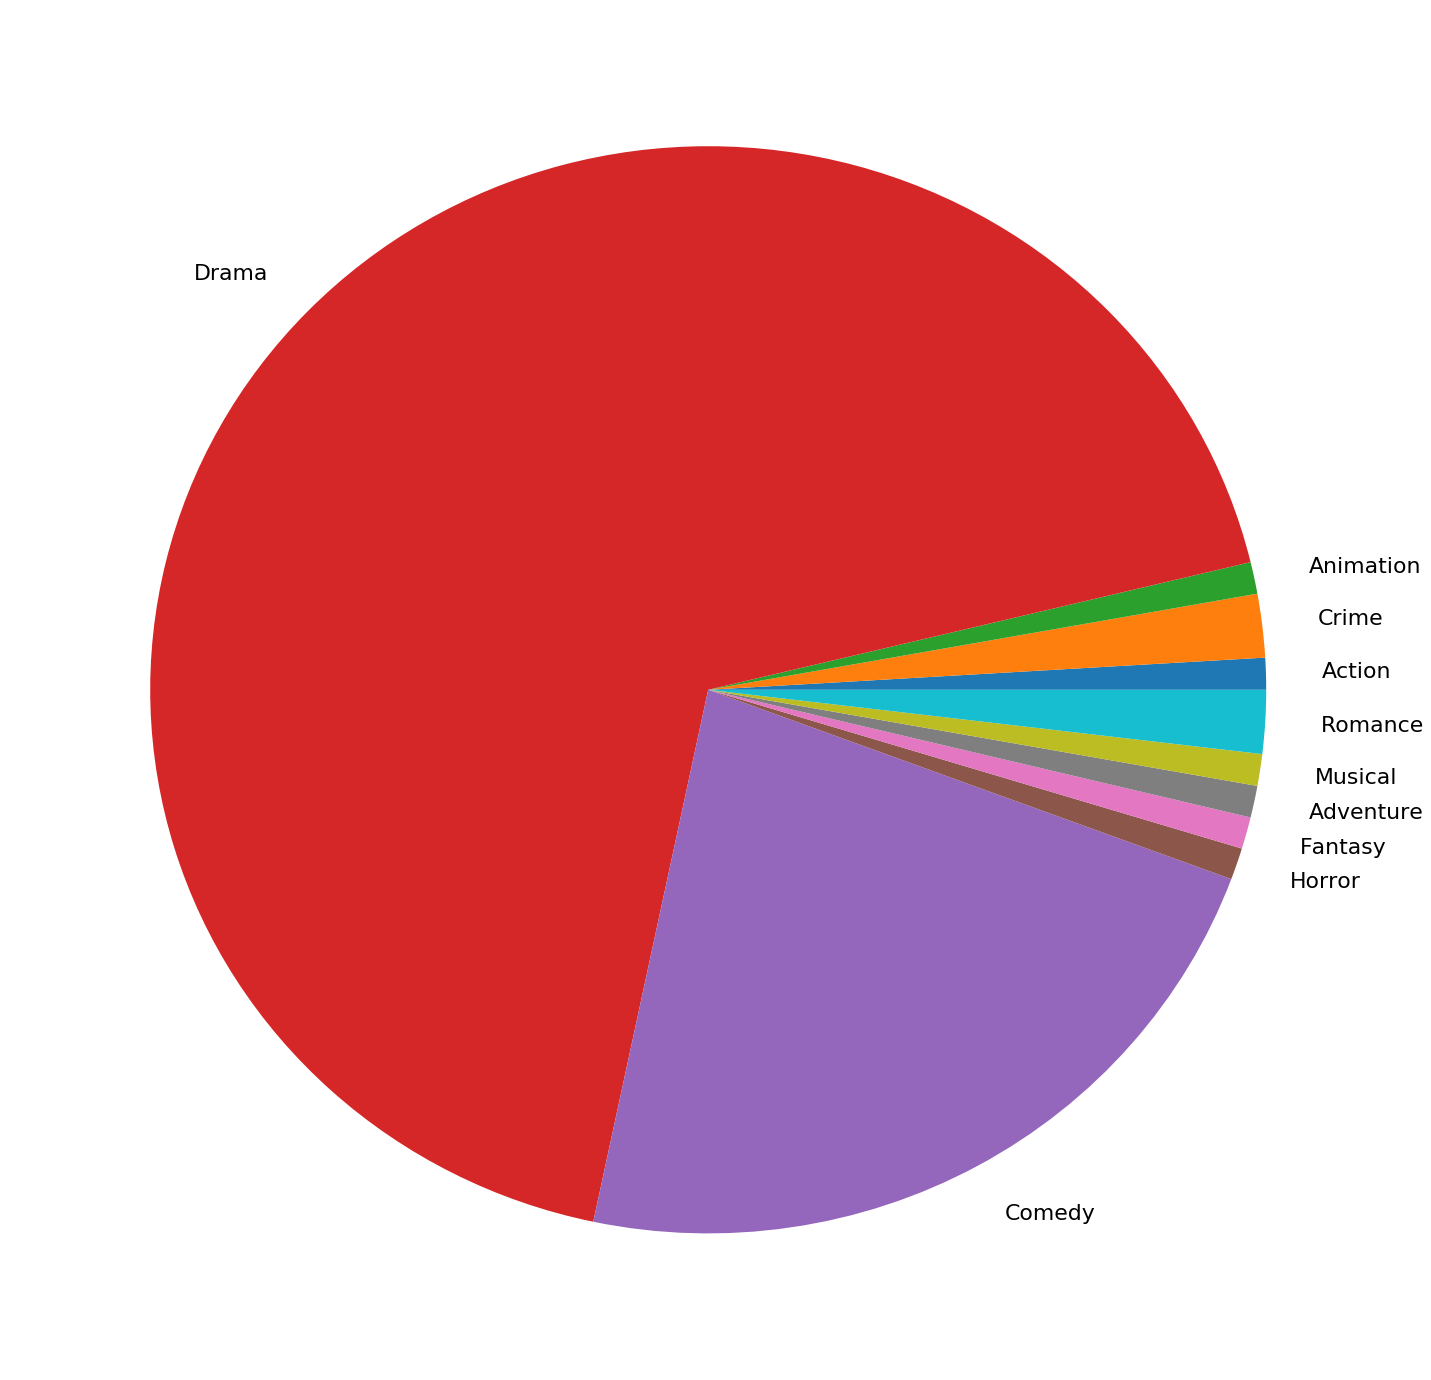

In [26]:
size_list = []
labels_list = []
for k,v in max_genre_dict.items():
    size_list.append(v)
    labels_list.append(k)
plt.figure(figsize=(25,25))
plt.rcParams.update({'font.size': 22})
plt.pie(size_list, labels = labels_list)